In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import statistics

In [5]:
df_short = pd.read_csv("data/processed/processed_short.csv")
df_medium = pd.read_csv("data/processed/processed_medium.csv")
df_long = pd.read_csv("data/processed/processed_long.csv")
df_long = df_long.loc[df_long['label'].isin([2, 3])]
df_long['label'] = df_long['label'].map({2: 1, 3: 0}).astype(int)
df_long = df_long.reset_index(drop=True)

# Word CLouds, and other statistics

In [6]:
def generate_statistics(dataframe):
    name =[x for x in globals() if globals()[x] is dataframe][0]
    lengths = []
    bag = []
    for ind in dataframe.index:
        word_list = []
        word_list = dataframe["text"][ind].split()
        lengths.append(len(word_list))
        bag += word_list
    
    print("The average document length in " + str(name) + " is " + str(statistics.mean(lengths)) + " words")
    print(" ")
    print("The ratio of labels in " + str(name) + " is:")
    print(dataframe["label"].value_counts(normalize=True))
    all_words_count = Counter(bag)
    wordcloud_all = WordCloud(stopwords=set(STOPWORDS),width = 1000, height = 1000, background_color='white').generate_from_frequencies(all_words_count)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud_all)
    plt.axis("off")
    plt.show()
    #wordcloud_all.to_file("images/" + str(name) + "_wordlcoud.png")


In [11]:
ham = df_short.loc[df_short["label"]==0]
spam = df_short.loc[df_short["label"]==1]

The average document length in ham is 8.024704172721611 words
 
The ratio of labels in ham is:
0    1.0
Name: label, dtype: float64


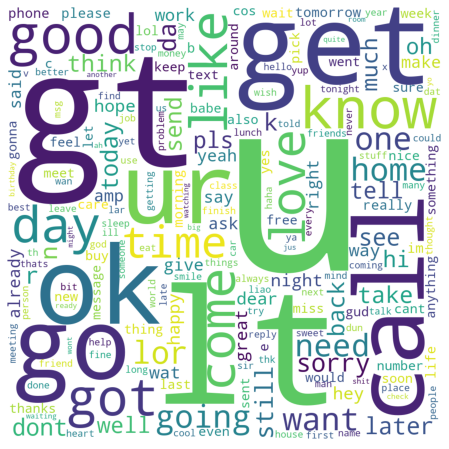

In [10]:
generate_statistics(ham)

The average document length in spam is 15.564926372155288 words
 
The ratio of labels in spam is:
1    1.0
Name: label, dtype: float64


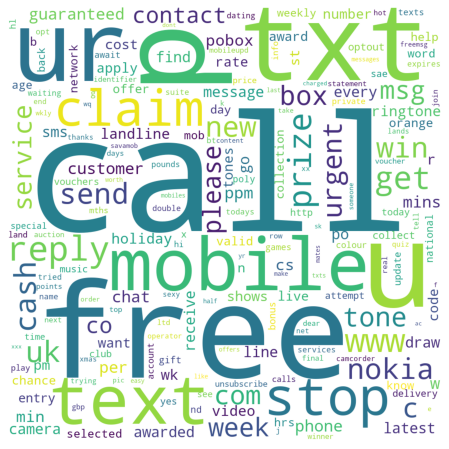

In [12]:
generate_statistics(spam)

The average document length in df_medium is 121.373 words
 
The ratio of labels in df_medium is:
1    0.5
0    0.5
Name: label, dtype: float64


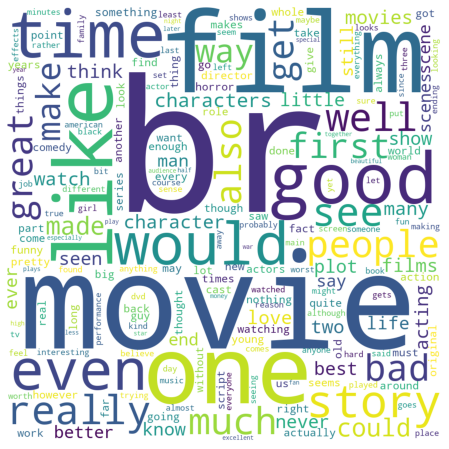

In [53]:
generate_statistics(df_medium)

In [14]:
pos = df_medium.loc[df_short["label"]==1]
neg = df_medium.loc[df_short["label"]==0]


,text,label
2,terry gilliam david peoples teamed create one...,1
5,like film several reasons soft spot films int...,1
8,small spoilers alert br br good movie good mo...,1
9,enjoy riddles suspense enjoy movie truth told...,1
11,say short little film filled secondary actors...,1
...,...,...
4959,supposed based wilkie collins woman white res...,0
4960,well let fair following cult classic like roa...,0
4977,giant mantis hanging arctic tired eskimos hit...,0
4983,keep review program short possible skip low b...,0


The average document length in _ is 124.15430267062314 words
 
The ratio of labels in _ is:
1    0.511869
0    0.488131
Name: label, dtype: float64


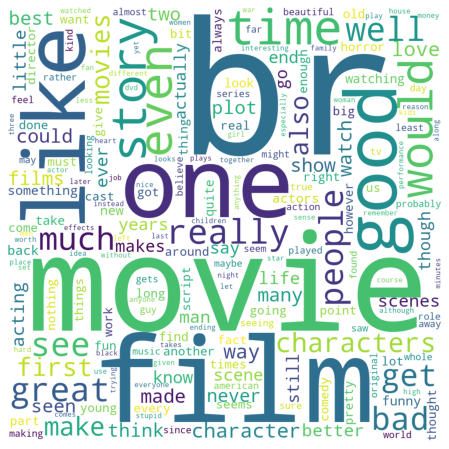

In [15]:
generate_statistics(pos)

The average document length in neg is 120.93966712898752 words
 
The ratio of labels in neg is:
0    0.501849
1    0.498151
Name: label, dtype: float64


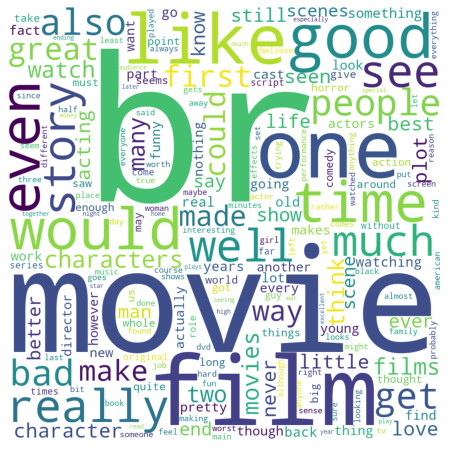

In [16]:
generate_statistics(neg)